In [19]:
import numpy as np
import copy
import math
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features
np.set_printoptions(precision=2) 

In [20]:
def compute_gradient_matrix(X,y,w,b):
    m,n=X.shape
    f_wb=X@w+b
    e=f_wb-y
    dj_dw=(1/m)*(X.T@e)
    dj_db=(1/m)*np.sum(e)
    return dj_dw,dj_db


In [21]:
def compute_cost_matrix(X,y,w,b):
    m,n=X.shape
    f_wb=X@w+b
    total_cost=(1/2*m)*np.sum((f_wb-y)**2)
    return total_cost    

In [22]:
def run_gradient_descent_feng(X,y,iterations=1000,alpha=1e-6):
    m,n=X.shape
    initial_w=np.zeros(n)
    initial_b=0
    w_out,b_out,hist_out=gradient_descent(X,y,initial_w,initial_b,compute_cost_matrix,compute_gradient_matrix,alpha,iterations)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.4f}")
    return (w_out,b_out)

In [26]:
def gradient_descent(X,y,w_in,b_in,cost_function,gradient_function,alpha,iterations):
    m=X.shape[0]
    hist={}
    hist["cost"]=[]
    hist["iters"]=[]
    hist["params"]=[]
    hist["grads"]=[]
    w=copy.deepcopy(w_in)
    b=b_in
    save_interval=np.ceil(iterations/10000)
    for i in range(iterations):
        dj_dw,dj_db=gradient_function(X,y,w,b)
        
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        
        if i==0 or i%save_interval==0:
            hist["cost"].append(cost_function(X,y,w,b))
            hist["iters"].append(i)
            hist["params"].append([w,b])
            hist["grads"].append([dj_dw,dj_db])
        
        if i%math.ceil(iterations/10)==0:
            cst=cost_function(X,y,w,b)
            print(f"Iterations: {i} Cost: {cst:0.5e}")
    
    return w,b,hist

Iterations: 0 Cost: 6.63025e+05
Iterations: 100 Cost: 2.77820e+05
Iterations: 200 Cost: 2.35390e+05
Iterations: 300 Cost: 2.10566e+05
Iterations: 400 Cost: 1.96041e+05
Iterations: 500 Cost: 1.87543e+05
Iterations: 600 Cost: 1.82571e+05
Iterations: 700 Cost: 1.79662e+05
Iterations: 800 Cost: 1.77960e+05
Iterations: 900 Cost: 1.76964e+05
w,b found by gradient descent: w: [18.7], b: -52.0834


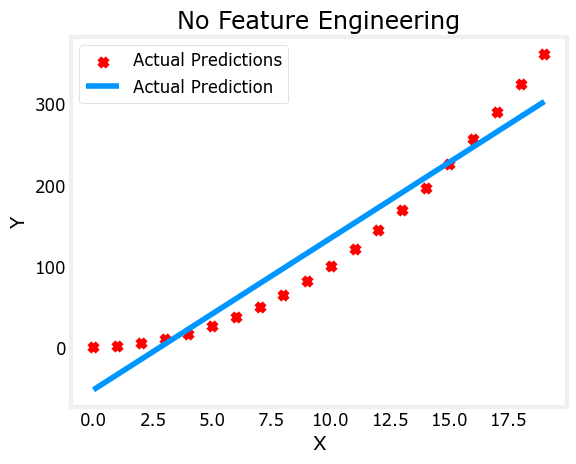

In [27]:
x=np.arange(0,20,1)
y=1+x**2
X=x.reshape(-1,1)

model_w,model_b=run_gradient_descent_feng(X,y,iterations=1000,alpha=1e-2)

plt.scatter(x,y,marker='x',c='r', label="Actual Predictions");plt.title("No Feature Engineering")
plt.plot(x,X@model_w+model_b,label="Actual Prediction");plt.xlabel("X");plt.ylabel("Y");plt.legend();plt.show()

Iterations: 0 Cost: 2.93169e+06
Iterations: 100 Cost: 9.06819e+01
Iterations: 200 Cost: 9.05989e+01
Iterations: 300 Cost: 9.05160e+01
Iterations: 400 Cost: 9.04332e+01
Iterations: 500 Cost: 9.03504e+01
Iterations: 600 Cost: 9.02677e+01
Iterations: 700 Cost: 9.01851e+01
Iterations: 800 Cost: 9.01025e+01
Iterations: 900 Cost: 9.00201e+01
w,b found by gradient descent: w: [1.], b: 0.0090


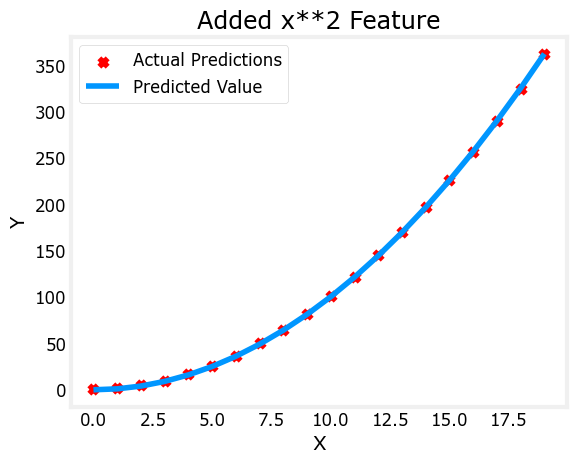

In [28]:
x=np.arange(0,20,1)
y=1+x**2
X=x**2
X=X.reshape(-1,1)

model_w,model_b=run_gradient_descent_feng(X,y,iterations=1000,alpha=1e-5)

plt.scatter(x,y,marker='x',c='r', label="Actual Predictions");plt.title("Added x**2 Feature")
plt.plot(x,X@model_w+model_b,label="Predicted Value");plt.xlabel("X");plt.ylabel("Y");plt.legend();plt.show()

Iterations: 0 Cost: 4.64745e+05
Iterations: 100 Cost: 1.57672e+05
Iterations: 200 Cost: 1.55196e+05
Iterations: 300 Cost: 1.52759e+05
Iterations: 400 Cost: 1.50361e+05
Iterations: 500 Cost: 1.48000e+05
Iterations: 600 Cost: 1.45676e+05
Iterations: 700 Cost: 1.43389e+05
Iterations: 800 Cost: 1.41137e+05
Iterations: 900 Cost: 1.38921e+05
w,b found by gradient descent: w: [0.01 0.08 0.06], b: 0.0015


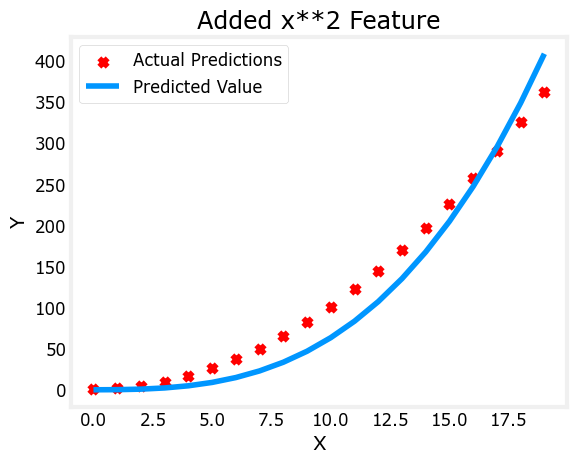

In [29]:
x=np.arange(0,20,1)
y=1+x**2
X=np.c_[x,x**2,x**3]

model_w,model_b=run_gradient_descent_feng(X,y,iterations=1000,alpha=1e-7)

plt.scatter(x,y,marker='x',c='r', label="Actual Predictions");plt.title("Added x**2 Feature")
plt.plot(x,X@model_w+model_b,label="Predicted Value");plt.xlabel("X");plt.ylabel("Y");plt.legend();plt.show()

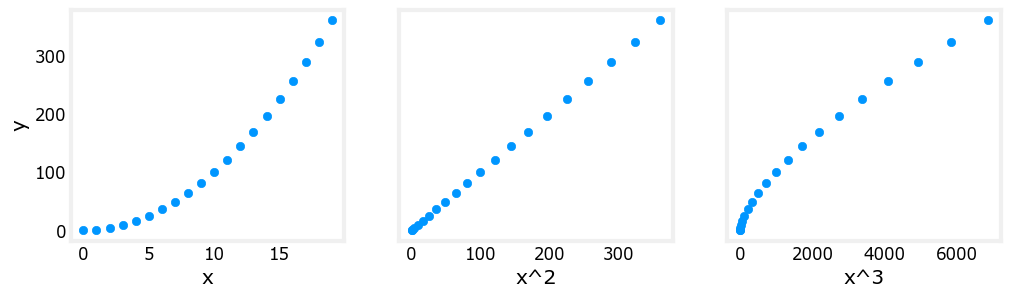

In [30]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
X_features = ['x','x^2','x^3']
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

In [31]:
x = np.arange(0,20,1)
y = x**2
X=np.c_[x,x**2,x**3]
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")
X=zscore_normalize_features(X)
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

Peak to Peak range by column in Normalized X:[  19  361 6859]
Peak to Peak range by column in Normalized X:[3.3  3.18 3.28]


Iterations: 0 Cost: 3.76859e+06
Iterations: 10000 Cost: 1.56375e+02
Iterations: 20000 Cost: 1.11355e+01
Iterations: 30000 Cost: 7.92967e-01
Iterations: 40000 Cost: 5.64675e-02
Iterations: 50000 Cost: 4.02107e-03
Iterations: 60000 Cost: 2.86342e-04
Iterations: 70000 Cost: 2.03905e-05
Iterations: 80000 Cost: 1.45202e-06
Iterations: 90000 Cost: 1.03399e-07
w,b found by gradient descent: w: [5.27e-05 1.13e+02 8.43e-05], b: 123.5000


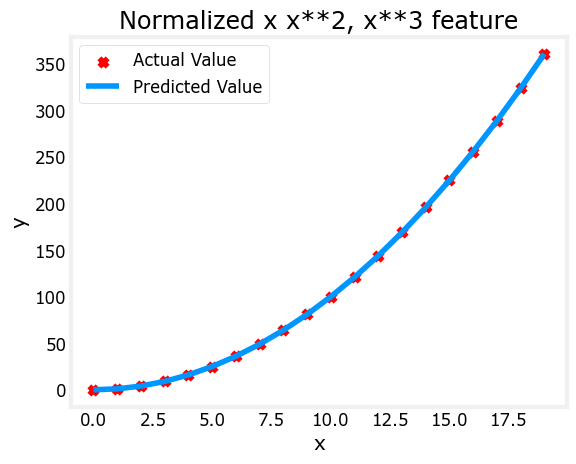

In [32]:
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X) 

model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Iteration         0, Cost: 2.24887e-01
Iteration    100000, Cost: 2.31061e-02
Iteration    200000, Cost: 1.83619e-02
Iteration    300000, Cost: 1.47950e-02
Iteration    400000, Cost: 1.21114e-02
Iteration    500000, Cost: 1.00914e-02
Iteration    600000, Cost: 8.57025e-03
Iteration    700000, Cost: 7.42385e-03
Iteration    800000, Cost: 6.55908e-03
Iteration    900000, Cost: 5.90594e-03
w,b found by gradient descent: w: [-1.61e+00 -1.01e+01  3.00e+01 -6.92e-01 -2.37e+01 -1.51e+01  2.09e+01
 -2.29e-03 -4.69e-03  5.51e-02  1.07e-01 -2.53e-02  6.49e-02], b: -0.0073


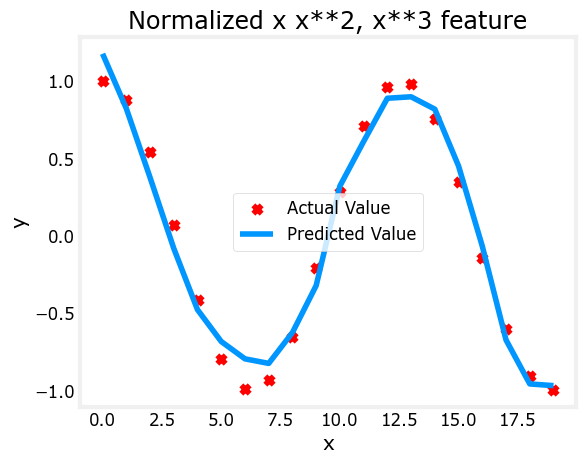

In [22]:
x=np.arange(0,20,1)
y=np.cos(x/2)

X=np.c_[x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9,x**10,x**11,x**12,x**13]
X = zscore_normalize_features(X) 

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()